In [11]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r"C:\\Program Files\\Tesseract-OCR\\tesseract.exe"
import cv2
from PIL import Image
import tempfile
import imutils
import numpy as np
import  matplotlib.pyplot as plt
from textblob import TextBlob
from ipynb.fs.defs .Text_Extraction import image_resize,set_image_dpi,remove_noise_and_smooth,text_rotation,croping_image,order_points,four_point_transform,get_text,sentiment_analysis,word_cloud,send_mail,text_2_speech
import smtplib
import os

In [12]:
img=cv2.imread("pan_q.jpeg")
img1=image_resize(img)
cv2.imshow("img",img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
dpi_image=set_image_dpi("pan_q.jpeg")
cv2.imshow("example",dpi_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
crop=str(input("Do you need to crop the image ?(Y/N)"))
if crop=="Y" or crop=="y":
    screenCnt =0
    croped_img=croping_image(dpi_image)
    cv2.imshow("dpi_image",croped_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    save=str(input("Do you want to save the croped image ?(Y/N)"))
    if save=="y" or save=="Y":
        croped_img=croped_img
    else:
        croped_img=dpi_image
        
else:
    print("Image is considered to be croped")
    croped_img=dpi_image
croped_img=image_resize(croped_img,750,750)
cv2.imshow("dpi_image",croped_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Do you need to crop the image ?(Y/N)n
Image is considered to be croped


In [16]:
rotate=str(input("Do you need to rotate the text?(Y/N)"))
if rotate=="Y" or rotate=="y":
    rotated_img=text_rotation(croped_img)
else:
    print("Image is considered to be in straight text")
    rotated_img=croped_img
cv2.imshow("dpi_image",rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Do you need to rotate the text?(Y/N)n
Image is considered to be in straight text


In [6]:
# clear_image=remove_noise_and_smooth(rotated_img)
# cv2.imshow('Image', clear_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [7]:
# text=pytesseract.image_to_string(clear_image,lang='eng')
# print(text)

In [8]:
# img=gray
# block_size = 5
# constant = 2
# th1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, constant)
# th2 = cv2.adaptiveThreshold (img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, constant)
    
# output = [img, th1, th2]
    
# titles = ['Original', 'Mean Adaptive', 'Gaussian Adaptive']
    
# for i in range(3):
#     plt.subplot(1, 3, i+1)
#     plt.imshow(output[i], cmap='gray')
#     plt.title(titles[i])
#     plt.xticks([])
#     plt.yticks([])

#     plt.show()  

# plt.show()  


In [35]:

image = imutils.resize(rotated_img,1024,665)
cv2.imshow('image0',image)
cv2.waitKey(0)



    
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray = cv2.threshold(gray,120, 255,cv2.THRESH_BINARY)[1]
gray = cv2.medianBlur(gray, 3)
cv2.imshow('gray',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [38]:
text=pytesseract.image_to_string(gray,lang='eng')
print(text)

ANKITA AGARWAL
ANAND PRAKASH AGARWAL

18/08/1986
Permanent Account Number

ALBPA3140K

Signature


In [19]:
# t=text.rsplit("INDIA")
# t

In [28]:
details=text.split("\n")

In [29]:
name=details[0]
father_name=details[1]
dob=details[3]
Pan_number=details[6]


In [30]:
print("NAME :",name)
print("Father's name :",father_name)
print("Date of Birth :",dob)
print("PAN NUMBER :",Pan_number)

NAME : ANKITA AGARWAL
Father's name : ANAND PRAKASH AGARWAL
Date of Birth : 18/08/1986
PAN NUMBER : ALBPA3140K


In [31]:
import cv2

image=cv2.imread("pan_q.jpg")
im=image_resize(img,750,750)
roi = cv2.selectROI(im)

print(roi)

im_cropped = im[int(roi[1]):int(roi[1]+roi[3]),int(roi[0]):int(roi[0]+roi[2])]

cv2.imshow("Cropped Image", im_cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

(110, 369, 146, 72)


In [33]:
x,y,w,h=(105, 376, 138, 56)
sign = im[y:y+h, x:x+w]
cv2.imshow("sign", sign)
cv2.waitKey(0)
cv2.destroyAllWindows()

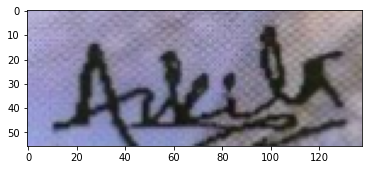

In [34]:
plt.imshow(sign, cmap='gray')